## Homework 3  Phys 115
Jesus Javier Serrano
4/18/18

### Problem 1
We shall go through different methods revolving around the Monte Carlo method and weighted sampling. Let us use the integral
$$ \int_{0}^{\pi} \sin(x) dx$$

The integral using 10 sample points is 1.572118
The integral using 17 sample points is 1.547875
The integral using 31 sample points is 2.122202
The integral using 56 sample points is 2.260904
The integral using 100 sample points is 1.896977
The integral using 177 sample points is 2.094752
The integral using 316 sample points is 1.980977
The integral using 562 sample points is 2.085341
The integral using 1000 sample points is 1.989702
The integral using 1778 sample points is 2.053719
The integral using 3162 sample points is 1.987766
The integral using 5623 sample points is 2.022144
The integral using 10000 sample points is 2.011403
The integral using 17782 sample points is 2.000217
The integral using 31622 sample points is 1.996443
The integral using 56234 sample points is 1.993989
The integral using 100000 sample points is 1.996695
The integral using 177827 sample points is 1.995220
The integral using 316227 sample points is 1.999914
The integral using 562341 sample points is 2.001250


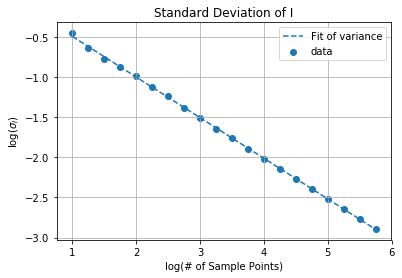

In [2]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.optimize as opt
# Uniform sampling
 
#Define the base function that is normalized to compliment the interval [0, pi]
def base_fn(x):
    return np.pi*np.sin(x*np.pi)



#Now we shall show the Monte Carlo integration method for N sample points. Note I included the s parameter 
#for the uncertainty calculation

def mont_int(N):
    val = 0
    val_2 = 0
    for i in range(N):
        x = rnd.random()
        val += base_fn(x)
        val_2 += base_fn(x)**2
    print('The integral using %s sample points is %.6f'%(N,val/N))
    #print(max(val))
    #print(max(val_2))
    return(val/N, val_2/N)

#Let us check our calculations with the standard deviation
def uncrtnt(N):
    sig_1, sig_2= mont_int(N)
    var = (sig_2 - ((sig_1)**2))
    #vl = 0.
    #for x in lis:
       # vl += (x - sig_1)**2
    #print(var)
    return sig_1,(var/N)**0.5

N_sampl = np.arange(1,6,0.25)
inte_calc = np.array([])
uncert = np.array([])
for i in N_sampl:
    n = int(10**i)
    v1, v2 = uncrtnt(n)
    inte_calc = np.append(inte_calc, [v1])
    uncert = np.append(uncert, [v2])

x_array = N_sampl
y_array = np.log(uncert)/np.log(10)

plt.grid(True)
plt.scatter(x_array, y_array, label = 'data')
#plt.errorbar(x_array, y_array, yerr = uncert)
plt.xlabel('log(# of Sample Points)')
plt.ylabel(r'log($\sigma_I$)')
plt.title('Standard Deviation of I')
#plt.show()

def fitfunction(x,*p):
    return p[0] + p[1]*x
guessparams = [1, -0.5]
#line-fit for the error of the forward-difference mehod
popt1, pcov1 = opt.curve_fit(fitfunction, x_array,y_array, p0=guessparams)
print('The logarithmic change in variance is: %.4f +/- %.4f'%(popt1[1],np.sqrt(pcov1[1,1])))

fit_array = fitfunction(x_array, *popt1)
plt.plot(x_array, fit_array,'--', label='Fit of variance')
plt.legend()
plt.show()

So far by simply using a pseudo-random number generator we are able to produce a predictable model that we are able to use to integrate our function. Also, as predicted the change in variance relative to the sample size used in the interval, in logarithmic scale, is about $-\frac{1}{2}$.

Now we shall improve our calculations by adjusting the weights being applied to each individual function value in order to calculate a normalized expectaion value of the function. Provided by the exercise we may define the weight of the sum to be the approximation of our sine function, which is $\frac{4}{\pi^2}x(\pi - x)$. With the graph below we may see that the approximation is precise to the sine function.

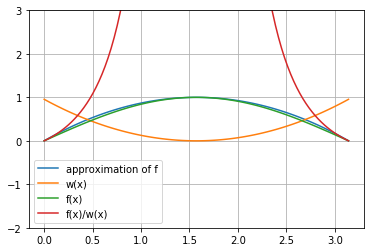

In [6]:
def aprox(x):
    return 4*x*(np.pi - x)/(np.pi**2)
def w(x):
    return 12*((x - np.pi/2)**2)/(np.pi**3)
    #return 0.5*(((2.*x/np.pi) - 1.)**2)
    #return (float(1/(np.pi - 2)))*(1 - ((2.*x/np.pi) - 1)**2)

def base_fn1(x):
    return np.sin(x)

def f_ovr_w(x):
    y_val = np.array([])
    for elem in x:
        top = base_fn1(elem)
        bot = w(elem)
        if bot == 0:
            if elem == 0:
                y_val = np.append(y_val, [0])
            else:
                y_val = np.append(y_val, [y_val[len(y_val) - 1]])
        else:
            y_val = np.append(y_val, [base_fn1(elem)/w(elem)])
        
    return y_val

x = np.linspace(0,np.pi,101)
smple = w(x)
aprx = aprox(x)
fn = base_fn1(x)
fn_ov_w = f_ovr_w(x)

plt.plot(x,aprx,label = 'approximation of f')
plt.plot(x,smple,label = 'w(x)')
plt.plot(x,fn, label='f(x)')
plt.plot(x,fn_ov_w, label='f(x)/w(x)')


#plt.plot(x, (fn/smple), label= 'f/w')
#plt.plot(x, (fn/aprx), label = 'f/approx')
plt.ylim(-2, 3)
plt.grid(True)
plt.legend()
plt.show()

Now let us run our new method of integration with the following code. Note that first we must determine our uniform distribution function which shall return an array of y-values. Since we have defined $w(t) = \frac{4}{\pi^2}t(\pi - t)$ then  we must perform the following task in order to define our array of y-values:
$$y(x) = \int_{0}^{x} \frac{4}{\pi^2}t(\pi - t) dt\\
 y(x) = \frac{4}{\pi^2}x^2(\frac{\pi}{2} - \frac{x}{3})\\
 $$
 Notice that by factoring out $\pi/3$ from our function for y and substituting $x/\pi = s$ we obtain:
 $$y(x) = -\frac{4}{3 \pi}(s^3 - \frac{3}{2}s^2)$$
 This is unfortunate since there is no clear solution for defining the inverse of y(x). However, we may use this as a sample approximation and add a few terms which won't alter the magnitude of the function too much. Thus, we shall perfect the function by defining as $w(t)  = -\frac{4}{\pi^2}(t - \frac{\pi}{2})^2 + 1$, but for simplicity we shall ignore the plus one term and justify it as minimal contribution to the integral of this function, which will make $y(x) = -\frac{4}{3 \pi^2}(x - \frac{\pi}{2})^3$. This leads to a simple inverse function of $$x(y) = \frac{\pi}{2} - (\frac{3 \pi^2}{4} y)^{\frac{1}{3}}$$
 
 

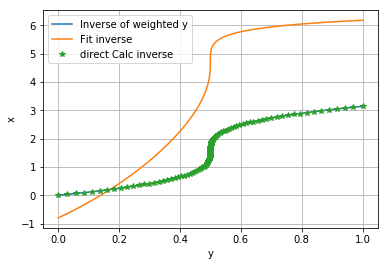

In [7]:
def y(x):
    #return 4 *(x**2)*((np.pi/2) - (x/3))/(np.pi**2)
    return 0.5 + (4/np.pi**3)*(x - (np.pi/2))**3

def xx(y):
    #return (np.pi*0.5) - (3*(np.pi**2)*y/4)**0.33333
    top1 = np.cbrt(y - 0.5)
    cnst = (np.pi)/(4**0.333333)
    return (np.pi/2) + (top1*cnst)

x = np.linspace(0,np.pi,100)
y1 = y(x)
y_smpl = np.linspace(0, 1, 100)
y2 = xx(y1)

def fitfunction1(x,*p):
    return p[0]*np.arctan(x - p[1])# + p[2]*x+ p[3]
guessparams1 = [1, 1]
#line-fit for the error of the forward-difference mehod
popt2, pcov2 = opt.curve_fit(fitfunction1, y1,x, p0=guessparams1)
#print('The logarithmic change in variance is: %.4f +/- %.4f'%(popt1[1],np.sqrt(pcov1[1,1])))


fit = fitfunction1(x, *popt2)
plt.grid(True)
plt.xlabel('y')
plt.ylabel('x')
plt.plot(y1,x, label = 'Inverse of weighted y')
plt.plot(y1, fit, label ='Fit inverse')
plt.plot(y1, y2, '*', label = 'direct Calc inverse')
plt.legend()
plt.show()

In [39]:
(np.pi)/(4**0.333333)

1.9790802717554987

By using the same format that we developed for the uniform distribution integration, we may alter it in order to account for the weights as so:

The integral using 10 sample points is 1.170274
The integral using 13 sample points is 1.222277
The integral using 17 sample points is 4.296575
The integral using 23 sample points is 1.479111
The integral using 31 sample points is 1.006108
The integral using 42 sample points is 1.184120
The integral using 56 sample points is 1.350129
The integral using 74 sample points is 2.142756
The integral using 100 sample points is 2.457443
The integral using 133 sample points is 5.190198
The integral using 177 sample points is 2.419721
The integral using 237 sample points is 1.878857
The integral using 316 sample points is 1.463298
The integral using 421 sample points is 1.562542
The integral using 562 sample points is 1.700672
The integral using 749 sample points is 2.104180
The integral using 1000 sample points is 2.128170
The integral using 1333 sample points is 1.838051
The integral using 1778 sample points is 1.760412
The integral using 2371 sample points is 1.927582
The integral using 3162 

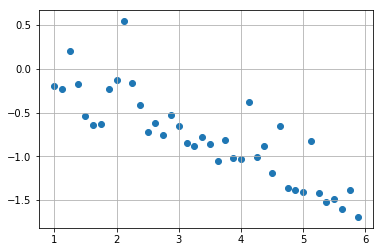

The logarithmic change in variance is: -0.2729 +/- 0.0385


In [10]:
def base_fn2(x):
    return float(base_fn1(x)/w(x))



#Now we shall show the Monte Carlo integration method for N sample points. Note I included the s parameter for the uncert. calc.
def mont_int2(N):
    val = 0
    val_2 = 0
    for i in range(N):
        y = rnd.random()
        x = xx(y)
        val += base_fn2(x)
        val_2 += base_fn2(x)**2
    print('The integral using %s sample points is %.6f'%(N,val/N))
    #print(max(val))
    #print(max(val_2))
    return(val/N, val_2/N)

#Let us check our calculations with the standard deviation
def uncrtnt2(N):
    sig_1, sig_2= mont_int2(N)
    var = (sig_2 - ((sig_1)**2))
    #vl = 0.
    #for x in lis:
       # vl += (x - sig_1)**2
    #print(var)``````
    return sig_1,(var/N)**0.5

N_sampl = np.arange(1,6,0.125)
inte_calc1 = np.array([])
uncert1 = np.array([])
for i in N_sampl:
    n = int(10**i)
    v1, v2 = uncrtnt2(n)
    inte_calc1 = np.append(inte_calc1, v1)
    uncert1 = np.append(uncert1, v2)

x_array = N_sampl
y_array = np.log(uncert1)/np.log(10)

plt.grid(True)
plt.scatter(x_array, y_array)
plt.show()


def fitfunction(x,*p):
    return p[0] + p[1]*x
guessparams = [1, -0.5]
#line-fit for the error of the forward-difference mehod
popt1, pcov1 = opt.curve_fit(fitfunction, x_array,y_array, sigma = 0.5*x_array, p0=guessparams)
print('The logarithmic change in variance is: %.4f +/- %.4f'%(popt1[1],np.sqrt(pcov1[1,1])))


Note that the importance sampling method provides a more precise model of variance than the uniform sampling method used earlier. The importance sampling method is about .008 units in magnitude farther to the predicted -0.5 units of change in variance relative to sample size and the rate of change varies about 0.005 units more than the uniform sampling method. Thus this is both a less precise and accurate calculation of the integral than the uniform sampling case, yet it is a much faster method and provides an acceptable estimate to the integral.

### Problem 2
Let us use the Von Neumann method in order to calculate the following integrals:
$$\text{(a)} \int_{1}^{2} x^2 dx\\
\text{(b)} 4\int_{0}^{1} \sqrt{1 - x^2} dx\\
\text{(c)}\int_{0}^{2} \sqrt{4 - x^2} dx$$

Integral approximation for part a is equal to: 2.2798508007949443 +- 0.01371591535274271


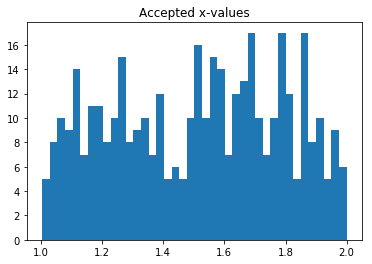

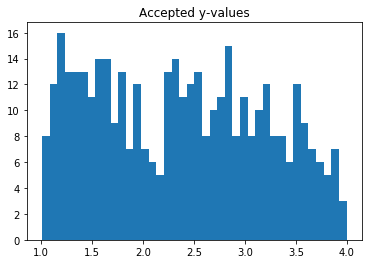

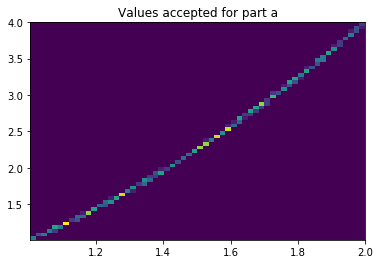

Integral approximation for part b is equal to: 3.1336458230340636 +- 0.025052528556805054


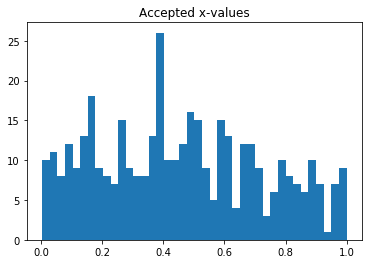

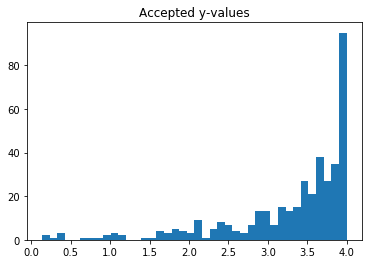

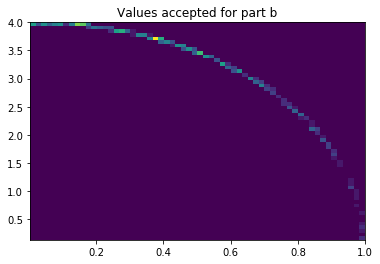

Integral approximation for part c is equal to: 3.143023752515634 +- 0.02501897429756224


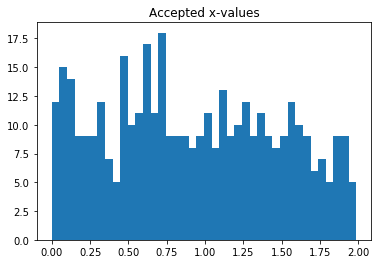

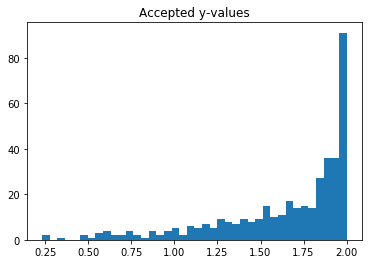

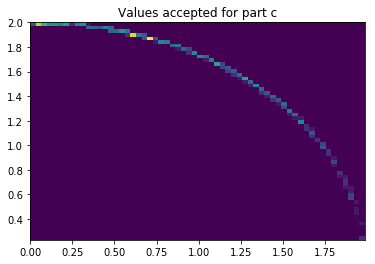

In [58]:
%matplotlib inline
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Determine the Von Neumann algorithm which we will use for all of these integrals
# Let us try to build a weighted funciton by using the second order taylor expansion of our functions 
#and then normalize them
def w1(x):
    return 0.22222*((2*x) + 1.5)

def w2(x):
    return 1.2*(1 - (.5*x**2))

def w3(x):
    return 0.15*(4 - (0.5*x**2))


def f1(x):
    return x**2

def f2(x):
    return 4*(1- (x**2))**0.5

def f3(x):
    return (4-(x**2))**0.5

#Assemble the code that will determine the accepted values
W_o = 1.5
# The maximum value is set to encompass all y-intervals for all w(x) in this problem. 
'''x_accpt = []
x_reject = []
f_accpt = []
f_reject = []
intg = 0
intg2 = 0'''

def von_n(f, w, a, b):
    while 1:
        tst_x = (b-a)*rnd.random() + a
        dumi = W_o*rnd.random()
        w_tst = w(tst_x)
        
        if dumi < w_tst:
            val = f(tst_x)/w(tst_x)
            return tst_x, f(tst_x), val
        
        #else:
         #   x_reject.append(tst_x)
          #  f_reject.append(f(tst_x))
            
N = 400


fnt_ls = ['f1', 'f2', 'f3']
w_ref = {'f1': [w1, 1, 2], 'f2': [w2,0,1], 'f3': [w3,0,2]}
for elem in fnt_ls:
    x_accpt = []
    x_reject = []
    f_accpt = []
    f_reject = []
    integral = 0
    sig_integral = 0
    
    for i in range(N):
        x_vl, f_vl, val= von_n(eval(elem), w_ref[elem][0], w_ref[elem][1], w_ref[elem][2])
        intg = val/N
        intg2 = ((val**2)/N - (val/N)**2)/N
        integral += intg
        sig_integral += intg2
        
        x_accpt.append(x_vl)
        f_accpt.append(f_vl)
        
    if elem == 'f1':
        print('Integral approximation for part a is equal to: %s +- %s'%(integral, sig_integral))
        plt.hist(x_accpt, bins = 40)
        plt.title('Accepted x-values')
        plt.show()
        
        plt.hist(f_accpt, bins = 40)
        plt.title('Accepted y-values')
        plt.show()
        
        
        plt.hist2d(x_accpt, f_accpt, bins=60)
        plt.title('Values accepted for part a')
        plt.show()
        
    elif elem == 'f2':
        print('Integral approximation for part b is equal to: %s +- %s'%(integral, sig_integral))
        plt.hist(x_accpt, bins = 40)
        plt.title('Accepted x-values')
        plt.show()
        
        plt.hist(f_accpt, bins = 40)
        plt.title('Accepted y-values')
        plt.show()
        
        
        plt.hist2d(x_accpt, f_accpt, bins=60)
        plt.title('Values accepted for part b')
        plt.show()
       
    elif elem == 'f3':
        print('Integral approximation for part c is equal to: %s +- %s'%(integral, sig_integral))
        plt.hist(x_accpt, bins = 40)
        plt.title('Accepted x-values')
        plt.show()
        
        plt.hist(f_accpt, bins = 40)
        plt.title('Accepted y-values')
        plt.show()
        
        
        plt.hist2d(x_accpt, f_accpt, bins=60)
        plt.title('Values accepted for part c')
        plt.show()
        
    




These calculations are quite precise but not so accurate to the actual answer. If we look into increasing our sample size of accepted points then we might find a trend just like in our first problem.

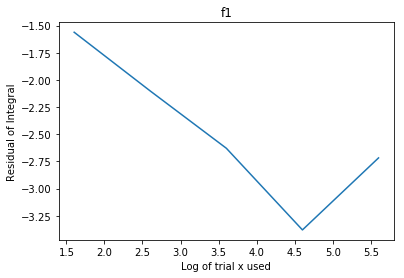

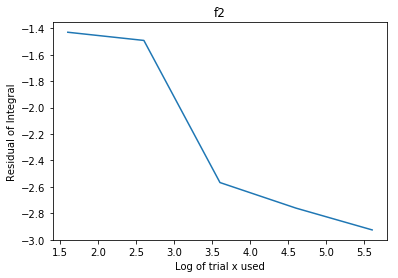

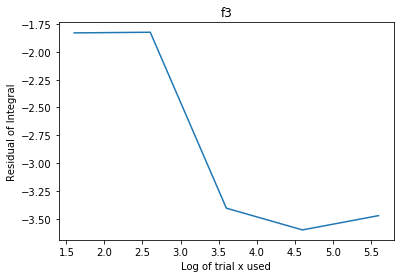

In [61]:
%matplotlib inline

lst_n = [40, 400, 4000, 40000, 400000]




fnt_ls = ['f1', 'f2', 'f3']
w_ref = {'f1': [w1, 1, 2], 'f2': [w2,0,1], 'f3': [w3,0,2]}
ultra = {}#'a': np.array([]), 'b': np.array([]), 'c': np.array([])}
for elem in fnt_ls:
    key = np.array([])
    for N in lst_n:
        x_accpt = []
        x_reject = []
        f_accpt = []
        f_reject = []
        integral = 0
        sig_integral = 0
        

        for i in range(N):
            x_vl, f_vl, val= von_n(eval(elem), w_ref[elem][0], w_ref[elem][1], w_ref[elem][2])
            intg = val/N
            intg2 = ((val**2)/N - (val/N)**2)/N
            integral += intg
            sig_integral += intg2

            x_accpt.append(x_vl)
            f_accpt.append(f_vl)

        if elem == 'f1':
            tru_val = 7/3
            rslt = abs(tru_val - integral)
            key = np.append(key, [rslt])
            
        elif elem == 'f2':
            tru_val = np.pi
            rslt = abs(tru_val - integral)
            key = np.append(key, [rslt])

        elif elem == 'f3':
            tru_val = np.pi
            rslt = abs(tru_val - integral)
            key = np.append(key, [rslt])
            
    ultra[elem] = key


for elem in fnt_ls:
    plt.plot(np.log10(lst_n), np.log10(ultra[elem]))
    plt.title(elem)
    plt.xlabel('Log of trial x used')
    plt.ylabel('Residual of Integral')
    plt.show()
    




These results seems stochastic and I can't really identify any trend from these trial runs. I took a naive approach and guessed that a logarithmic trend would be possible. However, it seems clear that the error in the integral calculation decreases as more trial points are used.

## Problem 3 Neutron Scattering

In this exercise we shall simulate the trajectories taken by neutrons being shot into a slab of lead. The lead has a thickness of 5 units and, for the sake of simplicity, an infinite height. Suppose these neutrons are all shot in a beam centered at y=0 with small width. We can generate an approximate simulations of Neutron scattering by creating a Monte Carlo algorithm which generates a random trajectory for a scattered neutron by using a uniform distribution of scattered angles.

The average number of interactions that a neutron can have is 15 scattering interations before a neutron is completely absorbed and loses all it's energy. Thus we shall build an algorithm wich randomly generates n-random scattered trajectories of a neutron as this neutron penetrates the lead slab, as long as n is less than 15.

Probability of neutrons penetrating this lead wall is about 0.029375
The FWHM of the distribution is 2.332


<function matplotlib.pyplot.show>

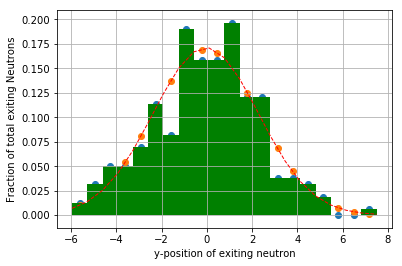

In [11]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as ptc
import matplotlib.mlab as mlab





def tst_nutron():
    x_pnt = [-2.0, -1.0]
    y_pnt = [0, 0]
    collis = 0
    switch = True
    while switch == True:
        x_rf = x_pnt[len(x_pnt) - 1]
        y_rf = y_pnt[len(y_pnt) - 1]
        if collis >= 15:
            switch = False
            break


        if bool(0 <= x_rf and x_rf <= 5) == True:
            x_new = x_rf + (np.cos(np.random.uniform(-np.pi, np.pi)))
            y_new = y_rf + (np.sin(np.random.uniform(-np.pi, np.pi)))
            collis += 1

        elif bool(x_rf > 5)==True:
            switch = False
            break
        elif bool(x_rf < -1.5) == True:
            switch = False
            break
        else:
            x_new = 2*x_rf - x_pnt[len(x_pnt) - 2]
            y_new = 2*y_rf - y_pnt[len(y_pnt) - 2]

        x_pnt.append(x_new)
        y_pnt.append(y_new)
    
    return x_pnt, y_pnt

neutrons = {}
trans_neutrons=[]
ps_y = np.array([])
for t in range(8000):
    mark = 'n%s'%t
    x_vl, y_vl = tst_nutron()
    neutrons[mark] = x_vl, y_vl
    for x in x_vl:
        if x >= 5:
            trans_neutrons.append(mark)
            mrk = x_vl.index(x)
            ps_y = np.append(ps_y, [y_vl[mrk]])
print('Probability of neutrons penetrating this lead wall is about %s'%(len(ps_y)/8000))

mu, sigma = np.mean(ps_y), np.var(ps_y)**0.5
print('The FWHM of the distribution is %.3f'%sigma)
n, bins, patches = plt.hist(ps_y, bins = 20, normed = 1, facecolor='green')

s = np.array([])
for i in range(len(bins) - 1):
    midp = (bins[i] + bins[i+1])/2
    s = np.append(s,[midp])

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

y_mid = np.array([])
for i in range(len(y) - 1):
    midp = (y[i] + y[i+1])/2
    y_mid = np.append(y_mid,[midp])

plt.scatter(s, n)
plt.scatter(s, y_mid)

plt.xlabel('y-position of exiting neutron')
plt.ylabel('Fraction of total exiting Neutrons')
plt.grid(True)
plt.show
#ptc.Rectangle((0, 0.2), 0.4, 1)
#plt.show()



From the simulation we observe a nice smooth gaussian distribution centered very closely at y = 0. The width of the distribution is about 4.6 units.

With the given random sample of 8000 neutrons, we find the probability of transmitted neutrons to be about $3.6\%$ which is very small but significant. We can illustrate the motion of these neutrons using the animation function from matplotlib. Below are two different examples of transmitted neutrons from the random sample, set right next to each other.

<IPython.core.display.Javascript object>


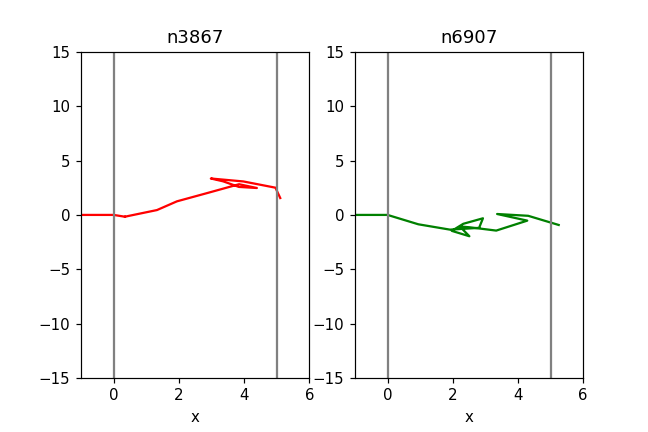

In [13]:
%matplotlib notebook
def update_lines(num, data1, data2, line1, line2):
    line1.set_data(data1[...,:num])
    line2.set_data(data2[...,:num])
    return line1,line2

n1 = np.random.choice(trans_neutrons)
n2 = np.random.choice(trans_neutrons)
data1 = np.array(neutrons[n1])
data2 = np.array(neutrons[n2])

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
l1, = ax1.plot([], [], 'r-')
l2, = ax2.plot([], [], 'g-')
for ax in (ax1, ax2):
    ax.axvline(x = 0, color='grey')
    ax.axvline(x = 5, color='grey')
    ax.set_xlim(-1, 6)
    ax.set_ylim(-15, 15)
    ax.set_xlabel('x')
    if ax == ax1:
        ax.set_title(n1)
    elif ax == ax2:
        ax.set_title(n2)
        
line_ani = animation.FuncAnimation(fig1, update_lines, 25, fargs=(data1, data2, l1, l2),interval=50, blit=False)

We can further illustrate the jet of neutrons created by the scattering happening within the lead slab if we are able to animate all transmitted neutrons at once. The code below does just that by building an array of neutron data from the random sample generate above. The end result is a beautiful mirage of colorful neutrons penetrating the lead slab.

<IPython.core.display.Javascript object>


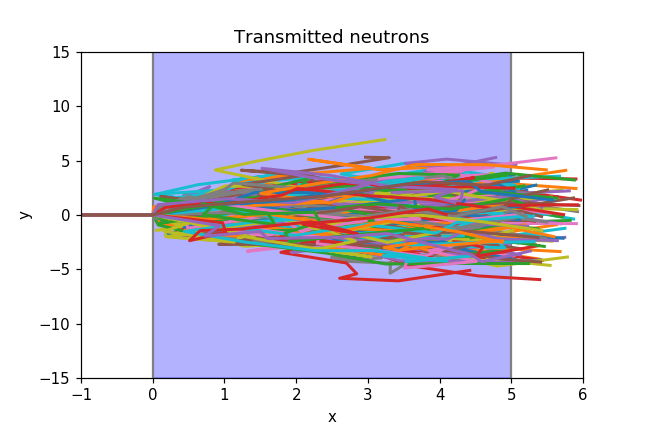

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import random 

fig = plt.figure()
ax1 = plt.axes(xlim=(-1, 6), ylim=(-15,15))
line, = ax1.plot([], [], lw=1)
plt.axvline(x = 0, color='grey')
plt.axvspan(0, 5, alpha=0.3, color='blue')
plt.axvline(x = 5, color='grey')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transmitted neutrons')

#plotlays, plotcols = [2], ["black","red"]
lines = []
for index in range(len(trans_neutrons)):
    lobj = ax1.plot([],[],lw=2)[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines

#x1,y1 = [],[]
#x2,y2 = [],[]

# fake data
frame_num = 20
data_matrix = []
for key in trans_neutrons:
    data_matr_elem = neutrons[key]
    data_matrix.append(np.array(data_matr_elem))


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

def animate(i):
    xlist = []
    ylist = []
    for data_set in data_matrix:
        x = data_set[0][0:i]
        y = data_set[1][0:i]
        xlist.append(x)
        ylist.append(y)

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=50, blit=True)

anim.save('neutron_scatter.mp4', writer=writer)
plt.show()

100%|█████████████████████████████████| 99999/99999 [00:03<00:00, 28438.07it/s]


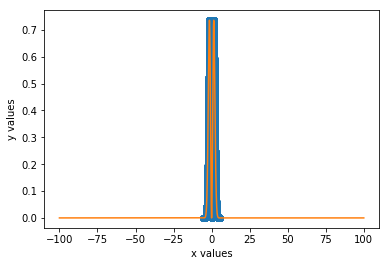

The acceptance ratio of x-values is 0.946529465294653


In [17]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

x_dom = np.linspace(-100, 100, 100000)

# Now define the normalized spectral power plot
def fo(x):
    s = x**2
    tp = -0.5*(x**2)
    return s*(np.exp(tp))

#This will be the weighted choice of the metropolis algorithm
def w(x):
    norm_term = (2/np.pi)**0.5
    return norm_term*fo(x)

# Let us confine our y-range with a W smaller than 1
pwr_spec = fo(x_dom)
W_o = max(pwr_spec)

#start at some arbitrary energy level
n = rd.choice(np.array([0,1]))
x_o = 0.01 + (((-1)**n)*(rd.random()*(0.001)))
x_i = x_o

# Define the Metropolis algorithm
met_xval= np.array([])
trials = 0
fail_xval = 0
met_yval= np.array([])
met_xval = np.append(x_i, met_xval)
met_yval = np.append(0, met_yval)


    
for i in tqdm(range(99999)):
    x_i = met_xval[len(met_xval) - 1]
    trials = trials + 1
    x_t = x_i + (100*rd.random()*((-1)**rd.choice(np.array([0,1])))) #note that 260 is about half of the magnitude of the energy interval
    r = w(x_t)/w(x_i)
    if r > rd.random():
        x_i = x_t
        next_x = Meta(x_i, w)
        met_xval = np.append(next_x, met_xval)
        met_yval = np.append(fo(next_x), met_yval)
    else:
        fail_xval = fail_xval + 1
    
#Let us plot our accepted values
plt.plot(met_xval, met_yval, 'o')
plt.plot(x, pwr_spec, '-')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()
accept_ratio = fail_xval/trials
print('The acceptance ratio of x-values is %s'%accept_ratio)
#plt.plot(np.log(x), np.log(pwr_spec))
#plt.hist(met_xval, 20, log=True)
#plt.show()


#plt.hist(met_xval, bins=np.logspace(np.log10(min(met_xval)),np.log10(max(met_xval)), 20))
#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#plt.xlabel('log of photon energy in MeV')
#plt.ylabel('log of accepted number of particles')
#plt.show()

In [19]:
trials

99999

In [33]:
#a
#a[0]
#a[0][1]